In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
import pandas as pd

In [3]:
# data = pd.read_csv('https://raw.githubusercontent.com/HendersonAlec2212/project_04/main/csv/PICKUP_DATA_CLEAN.csv', low_memory=False)
data = pd.read_csv('/home/dan/Downloads/SUV_DATA_CLEAN.csv')

In [4]:
data.head()

,brandName,modelName,vf_ModelID,vf_ModelYear,mileage,askPrice,msrp,color,vf_EngineCylinders,vf_FuelTypePrimary,vin
0,JEEP,Wrangler,1943.0,2017.0,9642,39962,39962,Black Clearcoat,6.0,Gasoline,322d48b4c60b477e2f9ed6b702a04e79de7a7fa2896521...
1,JEEP,Grand Cherokee,1949.0,2015.0,50460,32962,32962,Cashmere Pearlcoat,8.0,Gasoline,2ef50172db46389b72f4e99178a8e7711de2adf0658249...
2,JEEP,Wrangler JK,25197.0,2018.0,5844,35962,35962,Firecracker Red Clearcoat,6.0,Gasoline,6cb1784ba994af798c878b3f0d5270e893d8605cf47f94...
3,FORD,Escape,1798.0,2016.0,32026,18962,18962,Ruby Red Metallic Tinted Clearcoat,4.0,Gasoline,8ee60b54b5fba668f4766d4209b6aabedf3ea10a703fe2...
4,JEEP,Cherokee,1945.0,2017.0,7958,23462,23462,Diamond Black Crystal Pearlcoat,6.0,Gasoline,1ed760e28dc35ab6945f53a563f9cbcf894ff39c3b8dde...


In [5]:
data = data.drop(columns='color')
data = data.drop(columns='vin')
data = data.drop(columns='vf_ModelID')
data = data.drop(columns='msrp')

In [6]:
data.head()

,brandName,modelName,vf_ModelYear,mileage,askPrice,vf_EngineCylinders,vf_FuelTypePrimary
0,JEEP,Wrangler,2017.0,9642,39962,6.0,Gasoline
1,JEEP,Grand Cherokee,2015.0,50460,32962,8.0,Gasoline
2,JEEP,Wrangler JK,2018.0,5844,35962,6.0,Gasoline
3,FORD,Escape,2016.0,32026,18962,4.0,Gasoline
4,JEEP,Cherokee,2017.0,7958,23462,6.0,Gasoline


In [7]:
data['vf_FuelTypePrimary'].nunique()

2

In [7]:
data = pd.get_dummies(data)

In [8]:
data

,vf_ModelYear,mileage,askPrice,vf_EngineCylinders,brandName_ACURA,brandName_ALFA ROMEO,brandName_AUDI,brandName_BMW,brandName_BUICK,brandName_CADILLAC,...,modelName_XL7,modelName_XT4,modelName_XT5,modelName_XT6,modelName_Yukon,modelName_Yukon XL,modelName_ZDX,modelName_allroad,vf_FuelTypePrimary_Diesel,vf_FuelTypePrimary_Gasoline
0,2017.0,9642,39962,6.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2015.0,50460,32962,8.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2018.0,5844,35962,6.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2016.0,32026,18962,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2017.0,7958,23462,6.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139639,2016.0,45505,52001,8.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
139640,2016.0,27160,41106,6.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
139641,2014.0,94105,15958,6.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
139642,2016.0,30011,23000,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [9]:
y = data['askPrice']
X = data.drop(columns='askPrice')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=52)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
clf = RandomForestRegressor(random_state=1).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9848086784513332
Testing Score: 0.8925039270407192


In [12]:
feature_importances = clf.feature_importances_

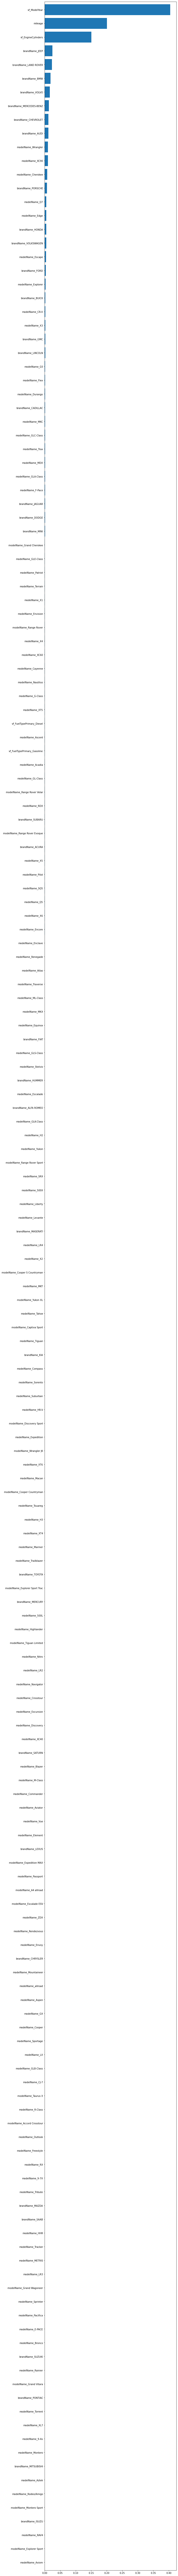

In [13]:
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,200)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [14]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [34]:
classifier = RandomForestRegressor()

In [35]:
classifier.fit(X_train, y_train)

RandomForestRegressor()

In [38]:
import joblib

In [39]:
SUVmodel = 'SUVmodel.sav'
joblib.dump(classifier, SUVmodel)

['SUVmodel.sav']

In [41]:
loaded_model = joblib.load('SUVmodel.sav')
result = loaded_model.score(X_test, y_test)

In [42]:
result

0.8925322860755469